# Seleção univariada de recursos
- Vamos **analisar cada uma das features de forma separada**, considerando sua relação com o target através de **testes estatísticos**

- Podemos selecionar os **K recursos de maior pontuação**, um **percentual** dos recursos, considerar a taxa de **falsos positivos / falsos negativos** ou até **criar nossa própria estratégia de seleção**

- **Precisamos** selecionar qual vai ser a função estatística usada e essa função irá retornar uma **pontuação** para cada um dos recursos

    - Métodos baseados no **teste F** vão analisar o **grau de dependência linear** entre duas variáveis aleatórias
        - Regressão: f_regression
        - Classificação: f_classif     
    - Os **métodos de informação mútua** conseguem **analisar qualquer tipo de dependência estatística**, mas **precisam de mais dados** para serem mais precisos. Também trabalham bem com dados esparsos.
        - Regressão: mutual_info_regression
        - Classificação: mutual_info_classif
    - **Metodos quadráticos só podem ser aplicados para valores não negativos**
        - Classificação: chi2 (também é útil para trabalharmos com dados esparsos)
        
 
- **"Aviso Cuidado para não usar uma função de pontuação de regressão com um problema de classificação, pois você obterá resultados inúteis."**

- Começando com o dataset load_wine do scikit-learn
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [1]:
# Importando o dataset load_wine
from sklearn.datasets import load_wine

In [2]:
# Importando X e y
X,y = load_wine(return_X_y=True,as_frame=True)

In [3]:
# Visualizando o número de recursos
X.shape

(178, 13)

# SelectKBest

### Criando o seletor SelectKBest e fazendo fit

In [4]:
from sklearn.feature_selection import SelectKBest
seletor = SelectKBest(k=5)
seletor = seletor.fit(X,y)

### Visualizando a pontuação de cada Feature

In [5]:
seletor.scores_

array([135.07762424,  36.94342496,  13.3129012 ,  35.77163741,
        12.42958434,  93.73300962, 233.92587268,  27.57541715,
        30.27138317, 120.66401844, 101.31679539, 189.97232058,
       207.9203739 ])

#### Visualizando nome das colunas

In [6]:
seletor.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

## Visualizando graficamente algumas features

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

### Analisando uma feature com pontuação baixa, uma media e uma alta
#### Quanto maior a pontuação, mais facil é para a feature classificar os dados

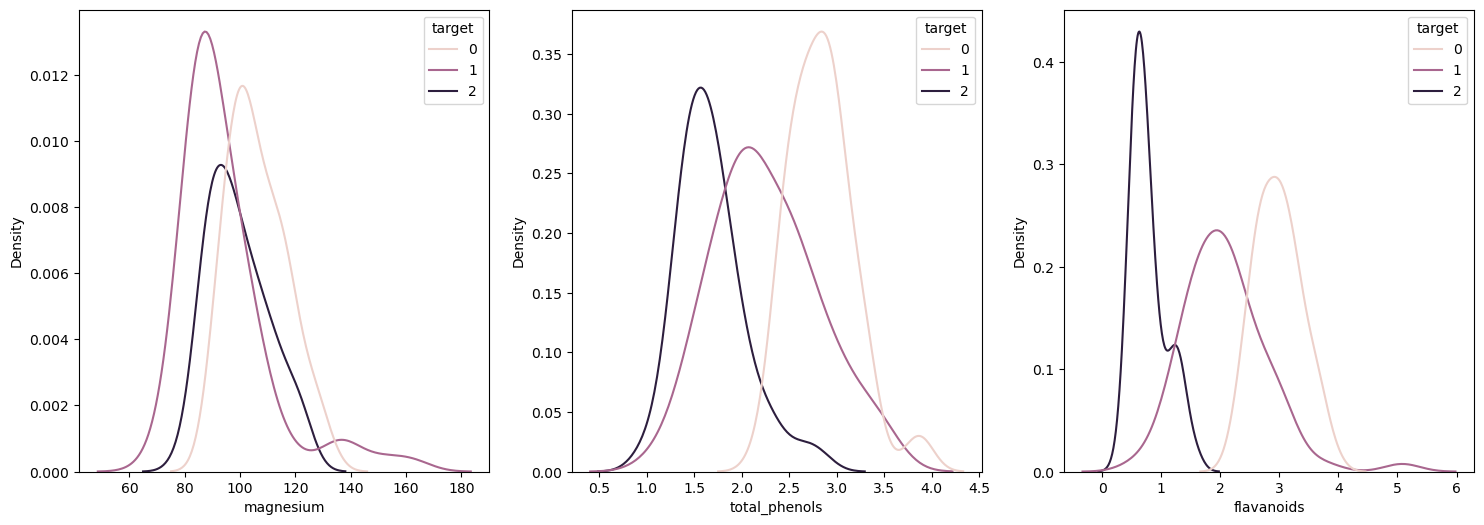

In [8]:
fig, ax = plt.subplots(ncols=3,figsize=(18,6))


sns.kdeplot(x=X.magnesium,hue=y,ax=ax[0]) # Baixa
sns.kdeplot(x=X.total_phenols,hue=y,ax=ax[1]) # Media
sns.kdeplot(x=X.flavanoids,hue=y,ax=ax[2]) # Alta

plt.show()

### Visualizando os valores gerados de melhor pontuação (k=5)

In [9]:
seletor.get_feature_names_out()

array(['alcohol', 'flavanoids', 'color_intensity',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

# Outro exemplo: KBest com o dataset iris

In [10]:
# Importando o dataset iris
from sklearn.datasets import load_iris

In [11]:
# Importando X e y
X_iris,y_iris = load_iris(return_X_y=True,as_frame=True)

In [12]:
# Criando o nosso seletor
seletor = SelectKBest(k=2)

In [13]:
# Fazendo o fit com os dados
seletor = seletor.fit(X_iris, y_iris)

In [14]:
# Visualizando os scores
seletor.scores_

array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ])

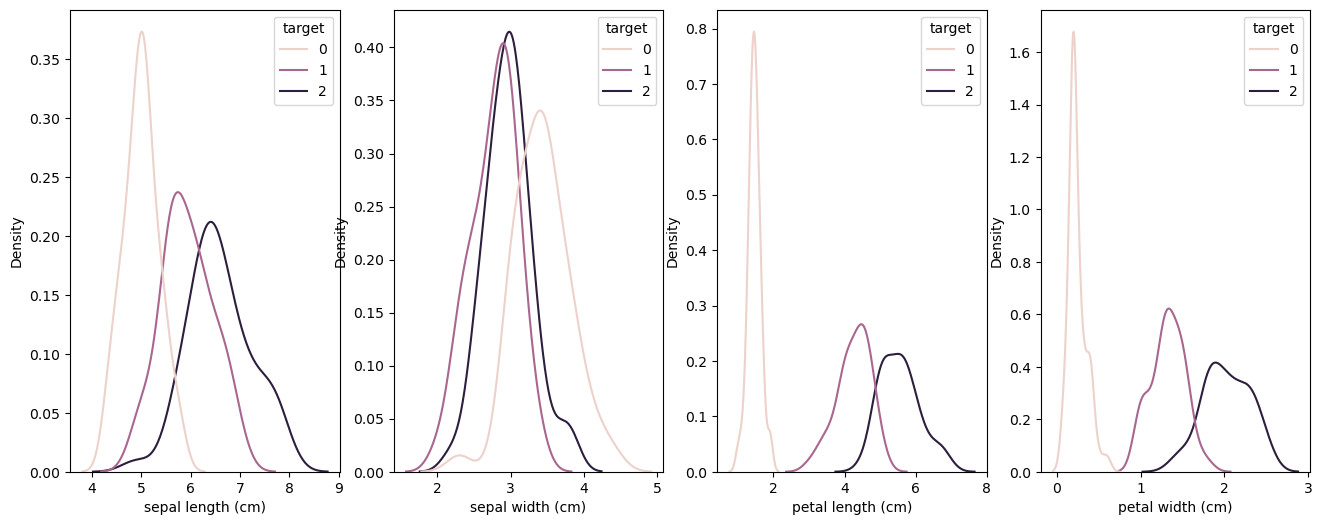

In [15]:
# Visualizando graficamente a distribuição dos dados
fig, ax = plt.subplots(ncols=4,figsize=(16,6))

sns.kdeplot(x = X_iris.iloc[:,0],hue=y_iris,ax=ax[0])
sns.kdeplot(x = X_iris.iloc[:,1],hue=y_iris,ax=ax[1])
sns.kdeplot(x = X_iris.iloc[:,2],hue=y_iris,ax=ax[2])
sns.kdeplot(x = X_iris.iloc[:,3],hue=y_iris,ax=ax[3])

plt.show()

### Visualizando as features escolhidas (k = 2)

In [16]:
seletor.get_feature_names_out()

array(['petal length (cm)', 'petal width (cm)'], dtype=object)

# Utilizando o KBest na regressão

In [17]:
from sklearn.datasets import fetch_california_housing

In [18]:
# Importando X e y
X_casas,y_casas = fetch_california_housing(return_X_y=True,as_frame=True)

### Criando o seletor e fazendo Fit

##### Por padrao, o SelectBest usa o  f_classif para classificar as melhores features, mas ele não serve pra regressão, temos que alterar.

In [19]:
from sklearn.feature_selection import f_regression

seletor = SelectKBest(score_func = f_regression, k=4)
seletor.fit(X_casas,y_casas)

SelectKBest(k=4, score_func=<function f_regression at 0x00000259FD6384A0>)

###  Visualizando os scores

In [20]:
seletor.scores_

array([1.85565716e+04, 2.32841479e+02, 4.87757462e+02, 4.51085756e+01,
       1.25474103e+01, 1.16353421e+01, 4.38005453e+02, 4.36989761e+01])

### Visualizando graficamente

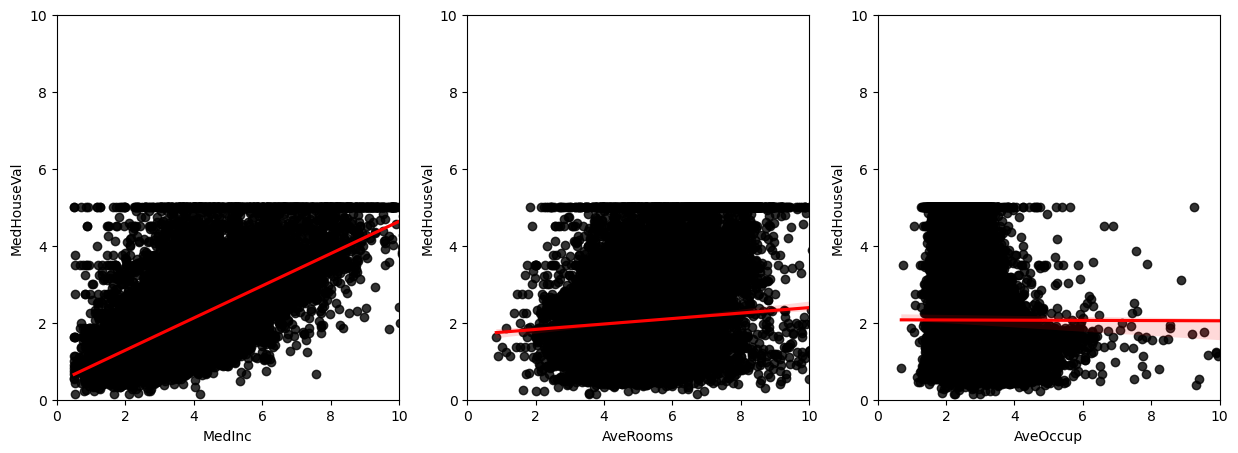

In [21]:
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

sns.regplot(x=X_casas.iloc[:,0],y=y_casas,scatter_kws={"color": "black"}, line_kws={"color": "red"},
            # ci=None,
            ax=ax[0])
sns.regplot(x=X_casas.iloc[:,2],y=y_casas,scatter_kws={"color": "black"}, line_kws={"color": "red"},
            # ci=None,fit_reg=False,
            ax=ax[1])
sns.regplot(x=X_casas.iloc[:,5],y=y_casas,scatter_kws={"color": "black"}, line_kws={"color": "red"},
           # ci=None,fit_reg=False,
            ax=ax[2])

ax[0].set(xlim=(0, 10),ylim=(0,10))
ax[1].set(xlim=(0, 10),ylim=(0,10))
ax[2].set(xlim=(0, 10),ylim=(0,10))

plt.show()

#### Temos no grafico uma relação boa, uma media e uma ruim.

# Outro Exemplo: dataSet Real

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [22]:
# Importando e visualizando a base
import pandas as pd
base = pd.read_csv("cartaocredito.csv")
base.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [23]:
# Separando X e y
X = base.drop('Class',axis=1)
y = base.Class

In [24]:
# Visualizando os valores de y
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Notamos que os valores alvos estao desbalanceados

- Separando em treino e teste
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Treino e teste

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

### Stratify = Y garante que a distribuição seja preservada 
##### Mesma proporção do Y para treino e teste como veremos abaixo

In [27]:
# Verificando o y de treino
y_train.value_counts()/y_train.shape[0] * 100

Class
0    99.827062
1     0.172938
Name: count, dtype: float64

In [28]:
# Verificando o y de teste
y_test.value_counts()/y_test.shape[0] * 100

Class
0    99.827636
1     0.172364
Name: count, dtype: float64

# Seleção de features com o SelectKBest

### Criando seletor e fazendo fit

In [29]:
seletor = SelectKBest(k=10)
seletor.fit(X_train,y_train)

SelectKBest()

In [30]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
198687,132606.0,1.974025,-1.240696,-0.537317,-0.919764,-1.085459,-0.265272,-0.974899,0.039702,-0.140586,...,0.133557,0.038919,-0.085885,0.272160,-0.422904,-0.534651,-0.487102,-0.004465,-0.040389,91.00
129694,79188.0,1.151280,-0.067410,1.274530,1.348017,-1.024868,-0.211370,-0.591920,0.118255,0.964253,...,-0.163537,-0.067541,-0.012958,0.001064,0.382891,0.398440,-0.407721,0.069214,0.037420,9.99
204218,135171.0,2.076327,0.042540,-1.803333,0.385207,0.401630,-0.735175,0.072287,-0.120261,0.716797,...,-0.246575,-0.385648,-1.066798,0.342803,0.280876,-0.298808,0.191718,-0.068979,-0.035671,1.98
134361,80771.0,0.951966,-1.002169,0.649152,0.089675,-1.505037,-0.869371,-0.330709,-0.275044,-0.912232,...,-0.029575,-0.035766,0.021394,-0.168223,0.784533,0.254052,0.615930,-0.031235,0.060012,204.90
173252,121404.0,-0.418134,-0.093914,0.306298,-2.548619,0.683397,-0.302791,0.554178,-0.103122,-0.808220,...,0.030008,-0.064795,-0.081516,0.115211,0.220057,-0.426465,-0.610719,0.093378,-0.027043,5.96


## Fazendo o transform

#### Antes ele estava mais demonstrando o funcionamento.

#### Mas precisa usar o transform,  efetivamente "filtra" o dataset deixando apenas com as melhores colunas.

In [31]:
seletor.transform(X_train)

array([[-0.5373172 , -0.91976418, -0.97489855, ...,  1.50600338,
        -0.17825182, -0.97053677],
       [ 1.27452953,  1.34801689, -0.59191994, ...,  0.10043582,
        -0.22043114, -0.00357948],
       [-1.80333274,  0.38520687,  0.0722869 , ...,  0.37203897,
         0.55020954, -0.17005534],
       ...,
       [ 1.58156778, -0.02428591,  0.60921201, ..., -1.87993724,
         1.24154117, -2.62321076],
       [ 0.49654001,  1.50531804,  0.10055102, ..., -0.79691297,
         0.40479457, -1.03306098],
       [ 1.8233943 ,  0.31299051,  0.49935058, ..., -0.9951504 ,
         0.51705177, -1.11336176]])

In [32]:
# Visualizando o novo shape
seletor.transform(X_train).shape

(190820, 10)

### Visualizando as colunas escolhidas

In [33]:
# Guardando em uma variavel pois iremos utilizar futuramente
colunas = seletor.get_feature_names_out()
colunas

array(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'],
      dtype=object)

- Utilizando esses dados na Árvore de Decisão

# Classificando com Arvore de decisão

In [34]:
# Criando o classificador
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

### Selecionando o X_train e X_test com as melhores colunas que foram selecionadas 

In [35]:
X_train_best = X_train.loc[:,colunas]
X_test_best = X_test.loc[:,colunas]

### Fazendo o fit do modelo


In [36]:
clf = clf.fit(X_train_best, y_train)

In [37]:
# Fazendo a previsão
y_predict = clf.predict(X_test_best)

### Avaliando com o f1_score

In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.7371794871794872

# Avaliando o desempenho do modelo com diferentes tamanhos do K

In [39]:
# Criando o nosso seletor
k = []
f1 = []

for i in range(1,len(X_train.columns)):
    
    # Selecionando as colunas
    seletor = SelectKBest(k=i)
    seletor.fit(X_train,y_train)
    colunas = seletor.get_feature_names_out()
    
    # Utilizando no modelo
    clf = DecisionTreeClassifier(random_state=0)
    X_train_best = X_train.loc[:,colunas]
    X_test_best = X_test.loc[:,colunas]
    clf = clf.fit(X_train_best, y_train)
    y_predict = clf.predict(X_test_best)
    
    
    # Avaliando o modelo
    f1_k = f1_score(y_test, y_predict)
    
    
    # Salvando as informações
    k.append(i)
    f1.append(f1_k)

## Visualizando graficamente a relação de f1_score com k

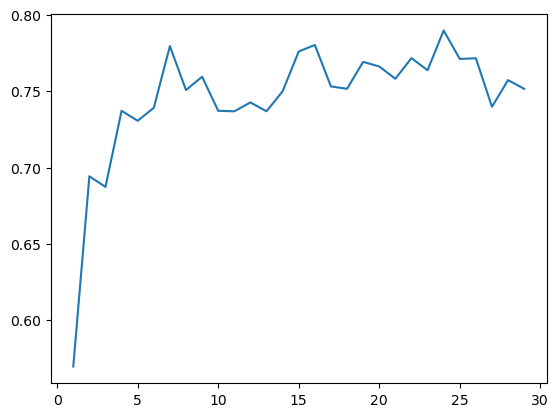

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(k, f1)

plt.show()

### Assim podemos ver o desempenho com cada numero de k e escolher o que nos atende melhor